In [1]:
# Include all the libraries
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Question 01

In [2]:
# Intensity Transformation
c= np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

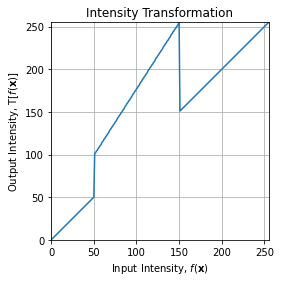

In [3]:
# Plot the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel(r'Input Intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output Intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid()
plt.show()

In [4]:
# Load the image
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
img_transformed = cv.LUT(img_orig, transform)

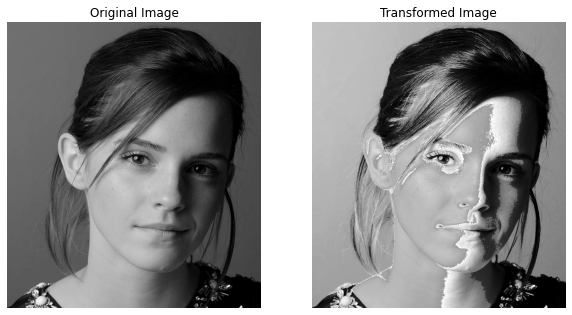

In [5]:
# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_orig, cmap = 'gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed, cmap = 'gray')
ax[1].set_title('Transformed Image')
for a in ax:
    a.axis('off')
plt.show()

## Question 02

### (a)

In [6]:
# Enhancing white matter
c= np.array([(50,25),(50,25),(180,90),(180,220)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

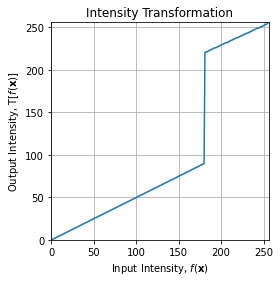

In [7]:
# Plot the transformation
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel(r'Input Intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output Intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 256)
ax.set_ylim(0, 256)
ax.set_aspect('equal')
ax.grid()
plt.show()

In [8]:
# Load the image
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
img_white_matter = cv.LUT(img_orig, transform)

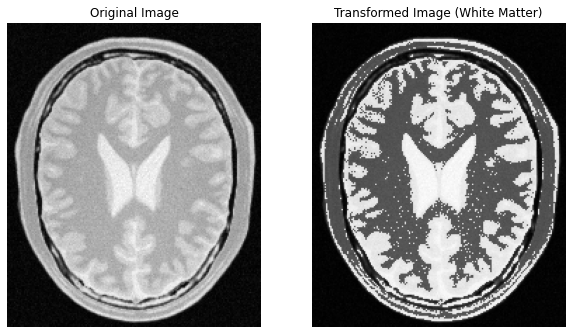

In [9]:
# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_orig, cmap = 'gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_white_matter, cmap = 'gray')
ax[1].set_title('Transformed Image (White Matter)')
for a in ax:
    a.axis('off')
plt.show()

### (b)

In [12]:
# Enhancing gray matter 
c= np.array([(50,50),(50,100),(180,255),(180,50)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
t3 = np.linspace(c[3,1]+1,125,255-c[3,0]).astype("uint8")

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

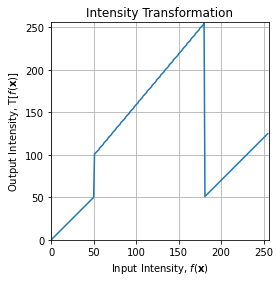

In [13]:
# Plot the transformation
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel(r'Input Intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output Intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 256)
ax.set_ylim(0, 256)
ax.set_aspect('equal')
ax.grid()
plt.show()

In [14]:
# Transform the image
img_gray_matter = cv.LUT(img_orig, transform)

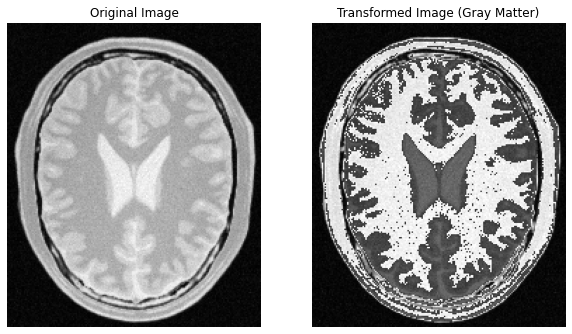

In [15]:
# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_orig, cmap = 'gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_gray_matter, cmap = 'gray')
ax[1].set_title('Transformed Image (Gray Matter)')
for a in ax:
    a.axis('off')
plt.show()

## Question 03

### (a)

In [16]:
# Gamma Correction
def apply_gamma_correction(L_channel, gamma):
    L_Channel_corrected = np.array([(i/255.0)**(gamma)*255.0 for i in L_channel]).astype("uint8")
    L_corrected = np.clip(L_Channel_corrected, 0, 255)
    return L_corrected

In [17]:
# Load image
original_image_BGR = cv.imread("highlights_and_shadows.jpg", cv.IMREAD_COLOR)
original_image_RGB = cv.cvtColor(original_image_BGR, cv.COLOR_BGR2RGB)
original_image_Lab = cv.cvtColor(original_image_BGR, cv.COLOR_BGR2Lab)

In [18]:
# Gamma correction to the L channel
L, a, b = cv.split(original_image_Lab)
gamma_value = 0.7
L_corrected = apply_gamma_correction(L, gamma_value)
lab_corrected = cv.merge((L_corrected, a, b))
rgb_corrected = cv.cvtColor(lab_corrected, cv.COLOR_Lab2RGB)

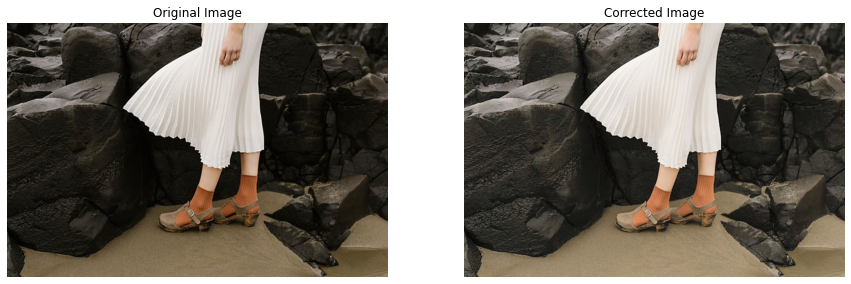

In [19]:
# Plot the images
f, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(original_image_RGB)
ax[0].set_title('Original Image')
ax[1].imshow(rgb_corrected)
ax[1].set_title('Corrected Image')
for a in ax:
    a.axis('off')
plt.show()


### (b)

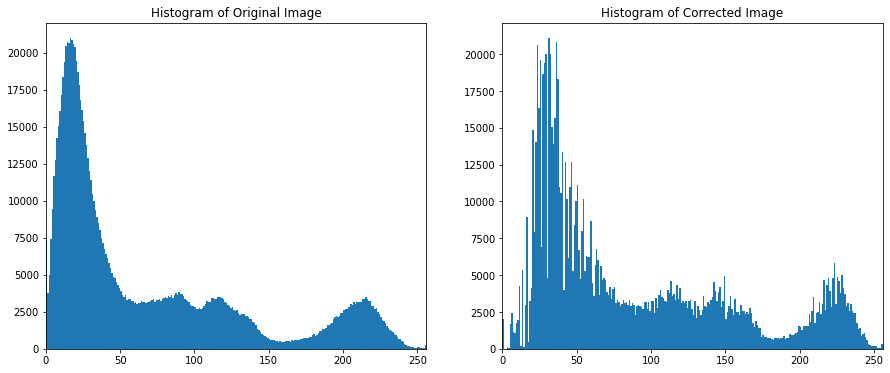

In [20]:
# Plot the histograms
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].hist(original_image_RGB.flatten(),256,[0,256])
ax[0].set_title("Histogram of Original Image")
ax[0].set_xlim([0,256])
ax[1].hist(rgb_corrected.flatten(),256,[0,256])
ax[1].set_title("Histogram of Corrected Image")
ax[1].set_xlim([0,256])
plt.show()

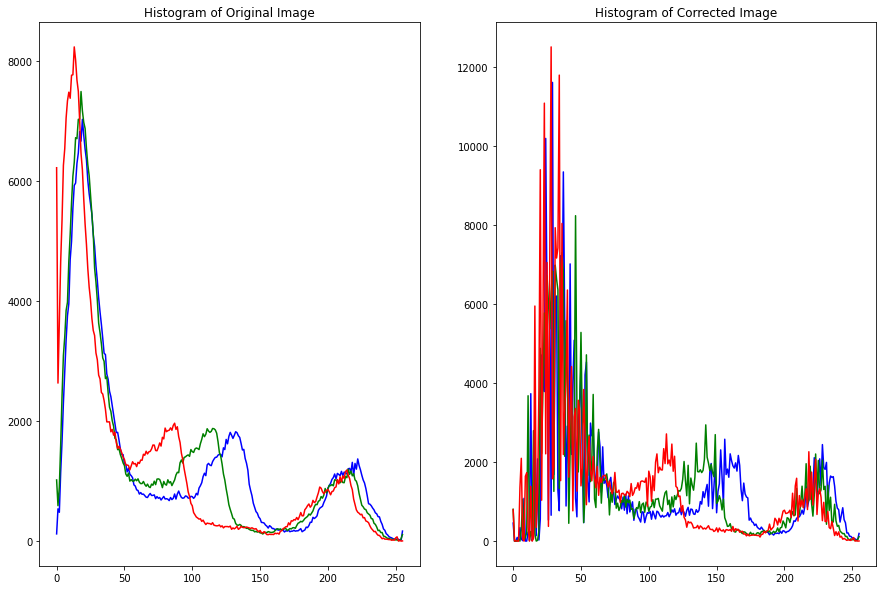

In [21]:
# RGB Histogram
color = ('b','g','r')

f, ax_rgb = plt.subplots(1, 2, figsize=(15, 10))

for i,col in enumerate(color):
    histogram_original = cv.calcHist([original_image_RGB],[i],None,[256],[0,256])
    ax_rgb[0].plot(histogram_original,color = col)
    histogram_gamma_corrected = cv.calcHist([rgb_corrected],[i],None,[256],[0,256])
    ax_rgb[1].plot(histogram_gamma_corrected,color = col)

ax_rgb[0].set_title('Histogram of Original Image')
ax_rgb[1].set_title('Histogram of Corrected Image')
plt.show()


## Question 04

In [22]:
# Load the image
image = cv.imread("spider.png", cv.IMREAD_COLOR)
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

In [23]:
# Split the HSV image into hue, saturation, and value planes
hue, saturation, value = cv.split(hsv_image)

In [24]:
# Intensity transformation function
def intensity_transformation(x, a, sigma):
    return np.minimum(x + (a * 128) * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255)

In [25]:
# Parameters for intensity transformation
a = 0.3
sigma = 70

# Apply intensity transformation to the saturation plane
transformed_saturation = np.vectorize(intensity_transformation)(saturation, a, sigma)
transformed_saturation = np.clip(transformed_saturation, 0, 255).astype(np.uint8)

# Merge the transformed saturation back into the HSV image
transformed_hsv_image = cv.merge((hue, transformed_saturation, value))

# Convert the transformed HSV image back to RGB for visualization
transformed_image = cv.cvtColor(transformed_hsv_image, cv.COLOR_HSV2RGB)

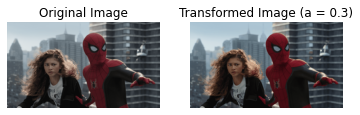

In [26]:
# Plot the Images
fx, ax1 = plt.subplots(1, 2)
ax1[0].imshow(rgb_image)
ax1[0].set_title("Original Image")
ax1[1].imshow(transformed_image)
ax1[1].set_title(f"Transformed Image (a = {a})")
for i in ax1:
    i.axis('off')
plt.show()

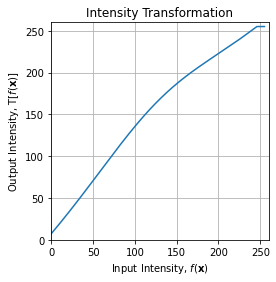

In [27]:
# Generate x values from 0 to 255
x_values = np.arange(256)
transform = np.vectorize(intensity_transformation)(x_values, a, sigma)

# Plot the transformation
fx, ax2 = plt.subplots()
ax2.plot(x_values, transform)
ax2.set_xlabel(r'Input Intensity, $f(\mathbf{x})$')
ax2.set_ylabel('Output Intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax2.set_xlim(0, 260)
ax2.set_ylim(0, 260)
ax2.set_aspect('equal')
plt.title("Intensity Transformation")
plt.grid()
plt.show()

## Question 05

In [28]:
# Compute Histogram
def compute_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram

In [29]:
# Compute Cumulative Histogram
def compute_cumulative_histogram(histogram):
    cumulative_histogram = np.zeros(256, dtype=int)
    cumulative_histogram[0] = histogram[0]
    for i in range(1, 256):
        cumulative_histogram[i] = cumulative_histogram[i - 1] + histogram[i]
    return cumulative_histogram

In [30]:
# Histogram Equalization
def histogram_equalization(image, histogram, cumulative_histogram, num_pixels):
    equalized_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
            equalized_value = int(255 * cumulative_histogram[pixel_value] / num_pixels)
            equalized_image[y, x] = equalized_value
    return equalized_image

In [31]:
#Load Image
image = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
num_pixels = image.shape[0] * image.shape[1]

In [32]:
# Compute histogram
histogram = compute_histogram(image)
cumulative_histogram = compute_cumulative_histogram(histogram)
cdf = cumulative_histogram / num_pixels

In [33]:
# Compute equalized image
equalized_image = histogram_equalization(image, histogram, cumulative_histogram, num_pixels)
equalized_histogram = compute_histogram(equalized_image)
equalized_cdf = compute_cumulative_histogram(equalized_histogram) / num_pixels

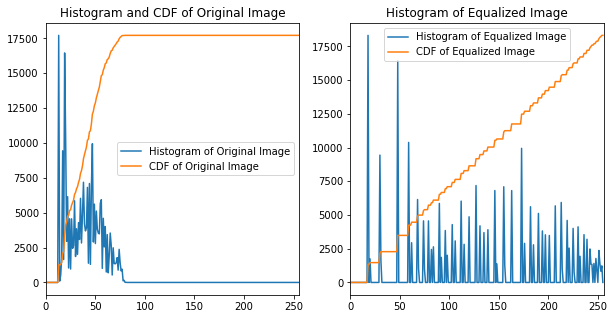

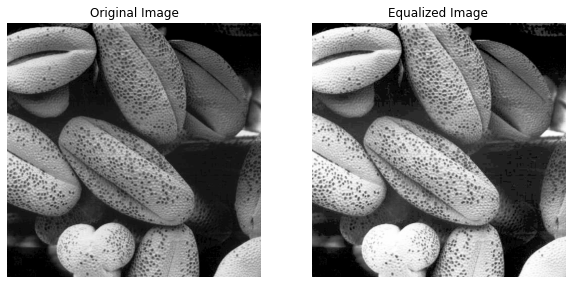

In [34]:
# Plot Histograms and CDFs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(histogram, label="Histogram of Original Image")
ax[0].plot(cdf * histogram.max(), label="CDF of Original Image")
ax[0].set_title("Histogram and CDF of Original Image")
ax[0].set_xlim([0, 256])
ax[0].legend()

ax[1].plot(equalized_histogram, label="Histogram of Equalized Image")
ax[1].plot(equalized_cdf * equalized_histogram.max(), label="CDF of Equalized Image")
ax[1].set_title("Histogram of Equalized Image")
ax[1].set_xlim([0, 256])
ax[1].legend()

plt.show()

fig, ax1 = plt.subplots(1, 2, figsize=(10, 5))

ax1[0].imshow(image, cmap="gray")
ax1[0].set_title("Original Image")
ax1[0].axis("off")

ax1[1].imshow(equalized_image, cmap="gray")
ax1[1].set_title("Equalized Image")
ax1[1].axis("off")

plt.show()


## Question 06

In [35]:
# Load the image
image = cv.imread("jeniffer.jpg", cv.IMREAD_COLOR)

In [36]:
# Convert the image to HSV color space
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

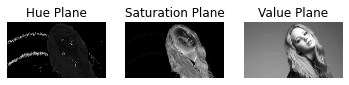

In [37]:
# Split the HSV image into hue, saturation, and value planes
hue, saturation, value = cv.split(hsv_image)

# Display the original image and the split planes
fx, ax = plt.subplots(1, 3)
ax[0].imshow(hue, cmap="gray")
ax[0].set_title("Hue Plane")
ax[1].imshow(saturation, cmap="gray")
ax[1].set_title("Saturation Plane")
ax[2].imshow(value, cmap="gray")
ax[2].set_title("Value Plane")

for a in ax:
    a.axis('off')
plt.show()

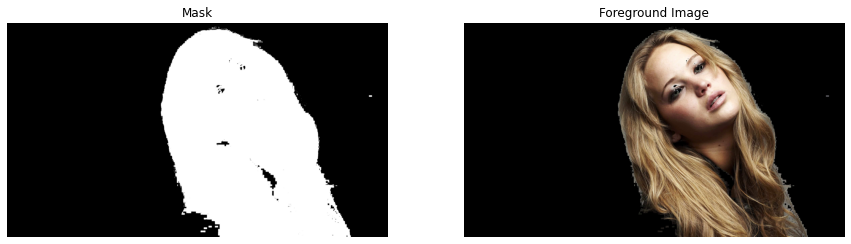

In [38]:
# Saturation plane can be used to extract the foreground
threshold = 12
mask = (saturation > threshold).astype(np.uint8) * 255  # type: ignore
mask_3d = np.repeat(mask[:, :, None], 3, axis=2)

foreground_hsv = cv.bitwise_and(hsv_image, mask_3d)
foreground_rgb = cv.cvtColor(foreground_hsv, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(mask_3d)
ax[0].set_title("Mask")
ax[1].imshow(foreground_rgb)
ax[1].set_title("Foreground Image")
for a in ax:
    a.axis('off')
plt.show()


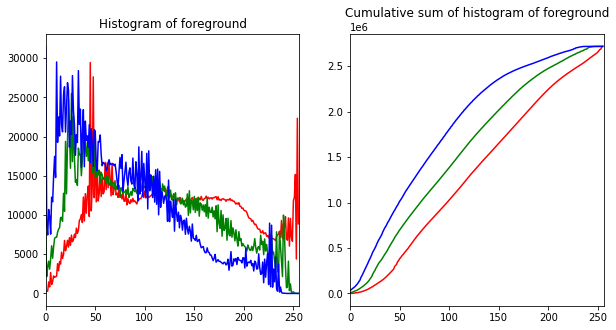

In [39]:
equalized_foreground = foreground_rgb.copy()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
colors = ('r', 'g', 'b')

total = mask.sum() // 255

# Loop over color channels and calculate histograms
for i, color in enumerate(colors):
    hist = cv.calcHist([foreground_rgb], [i], mask, [256], [0, 256])
    ax[0].plot(hist, color=color)
    ax[0].set_xlim([0, 256])

    cumulative = np.cumsum(hist)
    ax[1].plot(cumulative, color=color)
    ax[1].set_xlim([0, 256])

    transform = cumulative * 255 / total # type: ignore
    equalized_foreground[:, :, i] = transform[foreground_rgb[:, :, i]]

# Remove background again after equalization
equalized_foreground = cv.bitwise_and(equalized_foreground, mask_3d)

ax[0].set_title("Histogram of foreground")
ax[1].set_title("Cumulative sum of histogram of foreground")
plt.show()


C:\Users\chris\AppData\Local\Temp\ipykernel_21744\845855392.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


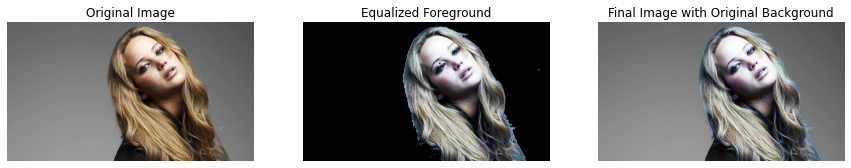

In [43]:
# Foreground and background
import matplotlib.pyplot as plt
background_mask_3d = 255 - mask_3d
background_hsv = np.bitwise_and(hsv_image, background_mask_3d)
background_rgb = cv.cvtColor(background_hsv, cv.COLOR_HSV2RGB)

final_image = background_rgb + equalized_foreground # type: ignore

plt, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(rgb_image)
ax[0].set_title("Original Image")
ax[1].imshow(equalized_foreground)
ax[1].set_title("Equalized Foreground")
ax[2].imshow(final_image)
ax[2].set_title("Final Image with Original Background")
for a in ax:
    a.axis('off')
plt.show()


## Question 07

In [44]:
import numpy as np
import cv2 as cv

# Sobel Filter using Custom Function
def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh = kernel.shape[0] // 2
    k_hw = kernel.shape[1] // 2
    h, w = image.shape
    
    # Normalize the input image to a float in the range [0, 1]
    image_normalized = cv.normalize(image.astype('float'), None, 0, 1, cv.NORM_MINMAX)
    
    result = np.zeros(image.shape, dtype='float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image_normalized[m - k_hh : m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten())

    # Scale the result to the range [0, 255] and convert to unsigned 8-bit integers
    result = result * 255
    result = np.minimum(255, np.maximum(0, result)).astype(np.uint8)

    return result


In [45]:
# Sobel Filter using Property of Convolution   
def filter_in_steps(input_image, first_kernel, second_kernel):

    # Define filtering for an already normalized image without any rounding
    def filter_step(image, kernel):
        assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
        k_hh = kernel.shape[0] // 2
        k_hw = kernel.shape[1] // 2
        h, w = image.shape
        result = np.zeros(image.shape, dtype='float')
        for m in range(k_hh, h - k_hh):
            for n in range(k_hw, w - k_hw):
                result[m, n] = np.dot(image[m - k_hh: m + k_hh + 1, n - k_hw: n + k_hw + 1].flatten(), kernel.flatten())
        return result

    image_float = cv.normalize(input_image.astype('float'), None, 0, 1, cv.NORM_MINMAX)
    result = filter_step(filter_step(image_float, first_kernel), second_kernel)
    result = result * 255
    result = np.minimum(255, np.maximum(0, result)).astype(np.uint8) # Limit between 0 and 255
    return result

In [46]:
# Load Image
image = cv.imread( "einstein.png", cv.IMREAD_GRAYSCALE)

In [47]:
# Sobel Filter using filter2D
kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
image_a = cv.filter2D(image, -1, kernel)

In [48]:
# Sobel Filter using custom function
image_b = filter(image, kernel)

In [49]:
# Sobel Filter using property of convolution
kernel1 = np.array([1, 2, 1]).reshape((3, 1))
kernel2 = np.array([1, 0, -1]).reshape((1, 3))
image_c = filter_in_steps(image, kernel1, kernel2)

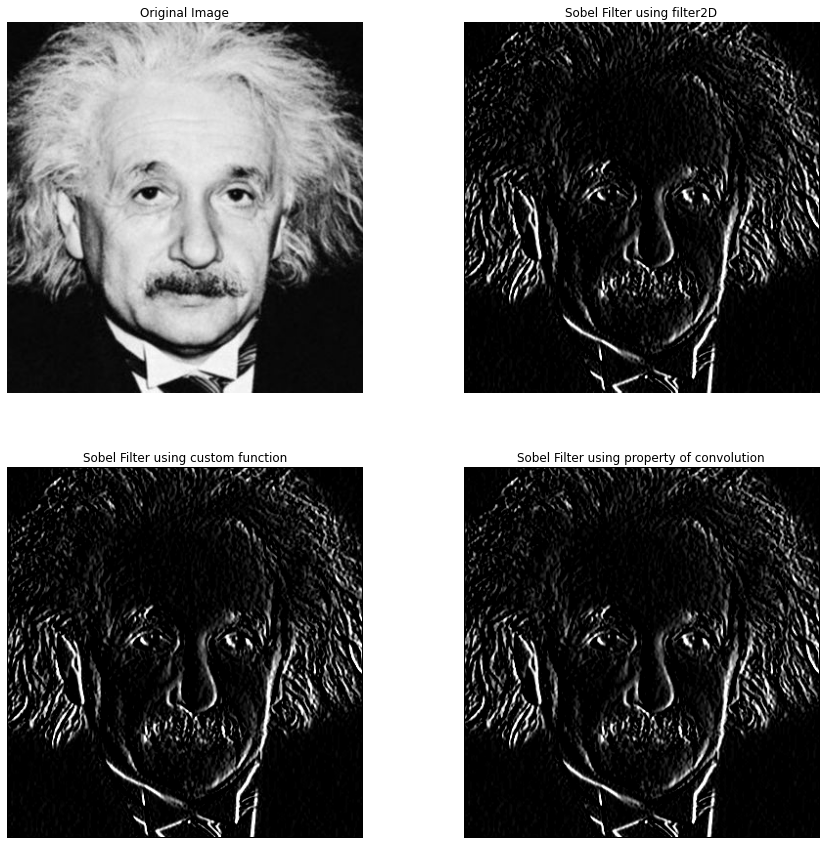

In [50]:
# Plot the images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 1].imshow(image_a, cmap='gray')
ax[0, 1].set_title("Sobel Filter using filter2D")
ax[1, 0].imshow(image_b, cmap='gray')
ax[1, 0].set_title("Sobel Filter using custom function")
ax[1, 1].imshow(image_c, cmap='gray')
ax[1, 1].set_title("Sobel Filter using property of convolution")
for a in ax.flatten():
    a.axis('off')
plt.show()


## Question 08

In [51]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Nearest Neighbor Interpolation
def nearest_neighbors(image, indices):
    indices[0] = np.minimum(np.round(indices[0]), image.shape[0] - 1)
    indices[1] = np.minimum(np.round(indices[1]), image.shape[1] - 1)
    indices = indices.astype(np.uint64)
    return image[indices[0], indices[1]]

In [53]:
# Bilinear Interpolation
def bilinear_interpolation(image, indices):
    floors = np.floor(indices).astype(np.uint64)
    ceils = floors + 1

    ceils_limited = [np.minimum(ceils[0], image.shape[0] - 1), np.minimum(ceils[1], image.shape[1] - 1)]

    p1 = image[floors[0], floors[1]]
    p2 = image[floors[0], ceils_limited[1]]
    p3 = image[ceils_limited[0], floors[1]]
    p4 = image[ceils_limited[0], ceils_limited[1]]

    # Repeat indices for the 3 color planes
    indices = np.repeat(indices[:, :, :, None], 3, axis=3)
    ceils = np.repeat(ceils[:, :, :, None], 3, axis=3)
    floors = np.repeat(floors[:, :, :, None], 3, axis=3)

    # Find the horizontal midpoints
    m1 = p1 * (ceils[1] - indices[1]) + p2 * (indices[1] - floors[1])
    m2 = p3 * (ceils[1] - indices[1]) + p4 * (indices[1] - floors[1])
    # Find the vertical midpoint of horizontal midpoints
    m = m1 * (ceils[0] - indices[0]) + m2 * (indices[0] - floors[0])
    return m.astype(np.uint8)

In [54]:
# Zooming
def zoom(image, factor, interpolation):
    h, w, _ = image.shape
    zoom_h, zoom_w = round(h * factor), round(w * factor)
    zoomed_image = np.zeros((zoom_h, zoom_w, 3)).astype(np.uint8)

    zoomed_indices = np.indices((zoom_h, zoom_w)) / factor
    if interpolation == "nn":
        zoomed_image = nearest_neighbors(image, zoomed_indices)
    elif interpolation == "bi":
        zoomed_image = bilinear_interpolation(image, zoomed_indices)
    
    return zoomed_image

In [55]:
# Normalized SSD
def normalized_ssd(image1, image2):
    ssd = np.sum((image1 - image2)**2)
    return ssd / (image1.size * 255 * 255)

In [56]:
# Load the image
image = cv.imread( "zooming/im04small.png", cv.IMREAD_COLOR)
original_image = cv.imread( "zooming/im04.png", cv.IMREAD_COLOR)

zoomed_nn = zoom(image, 4, 'nn')
print(normalized_ssd(zoomed_nn, original_image))

zoomed_bi = zoom(image, 4, 'bi')
print(normalized_ssd(zoomed_bi, original_image))

0.0012573230016836275
0.00125580531543641


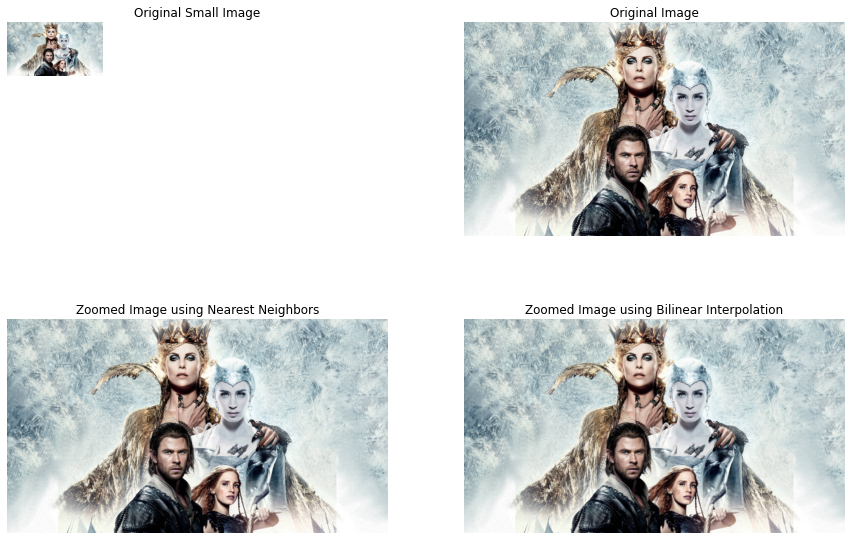

In [57]:
# Plot the images
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0, 0].set_title("Original Small Image")
ax[0, 0].set_xlim(0, original_image.shape[1])
ax[0, 0].set_ylim(original_image.shape[0], 0)

ax[0, 1].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax[0, 1].set_title("Original Image")

ax[1, 0].imshow(cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB))
ax[1, 0].set_title("Zoomed Image using Nearest Neighbors")

ax[1, 1].imshow(cv.cvtColor(zoomed_bi, cv.COLOR_BGR2RGB))
ax[1, 1].set_title("Zoomed Image using Bilinear Interpolation")

for a in ax.flatten():
    a.axis('off')
plt.show()



In [58]:
# SSD for all images
for i in range(1, 12):
    num = str(i).zfill(2)
    small_image = cv.imread(f"zooming/im{num}small.png", cv.IMREAD_COLOR)
    large_image = cv.imread(f"zooming/im{num}.png", cv.IMREAD_COLOR)

    zoomed_nn = zoom(small_image, 4, "nn")
    zoomed_bi = zoom(small_image, 4, "bi")
    try:
        print(f"Image {num}: \n\tN.neighbors = {normalized_ssd(zoomed_nn, large_image)},\n\tBilinear = {normalized_ssd(zoomed_bi, large_image)}")
    except: pass

Image 01: 
	N.neighbors = 0.0006168664775379207,
	Bilinear = 0.0006037221557710472
Image 02: 
	N.neighbors = 0.00025825407028279724,
	Bilinear = 0.00024931605721446165
Image 04: 
	N.neighbors = 0.0012573230016836275,
	Bilinear = 0.00125580531543641
Image 05: 
	N.neighbors = 0.0008397238286200464,
	Bilinear = 0.0008259538420942087
Image 06: 
	N.neighbors = 0.0005373686353222803,
	Bilinear = 0.0005462159368508155
Image 07: 
	N.neighbors = 0.0004702600674920704,
	Bilinear = 0.0004647452514757946
Image 09: 
	N.neighbors = 0.00043194078132342264,
	Bilinear = 0.00041013587989662095


## Question 09

In [59]:
# Load the image
image = cv.imread('Flower.jpg', cv.IMREAD_COLOR)

In [60]:
# Create a mask and initialize it
mask = np.zeros(image.shape[:2], np.uint8)

In [61]:
# Define rectangular region of interest (ROI) for initial background and foreground
rect = (50, 100, image.shape[1], image.shape[0] - 400)

In [62]:
# Apply GrabCut algorithm
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 15, cv.GC_INIT_WITH_RECT)

# Select pixels that are background or probably background as 0 and others as 1
foreground_mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8') 
background_mask = 1 - foreground_mask

# Create foreground and background images
foreground_image = image * foreground_mask[:, :, np.newaxis]
background_image = image * background_mask[:, :, np.newaxis]

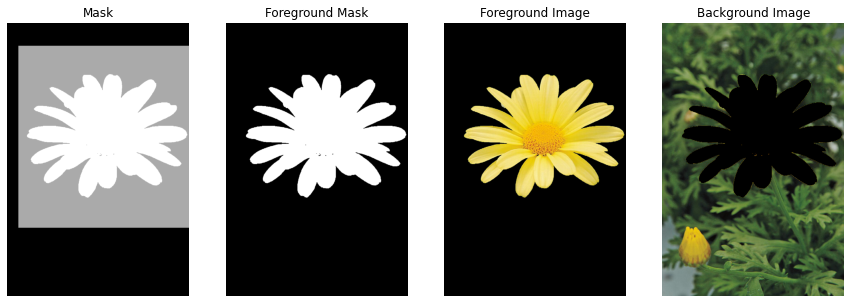

In [63]:
# Plot the images
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Mask")
ax[1].imshow(foreground_mask, cmap='gray')
ax[1].set_title("Foreground Mask")
ax[2].imshow(cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground Image")
ax[3].imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB))
ax[3].set_title("Background Image")
for a in ax:
    a.axis('off')
plt.show()

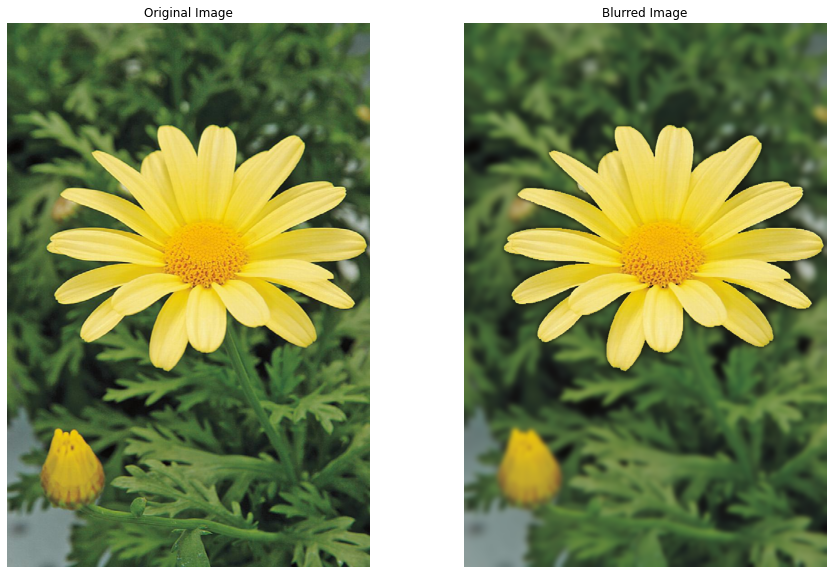

In [64]:
# Image with blurred background
kernel = 51
sigma = 5
blurred_background = cv.GaussianBlur(background_image, (kernel, kernel), sigma)
blurred_background = blurred_background * background_mask[:, :, np.newaxis]
blurred_image = blurred_background + foreground_image
# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB))
ax[1].set_title("Blurred Image")
for a in ax:
    a.axis('off')
plt.show()